In [8]:
import numpy as np

def numerical_differentiation(x, y, method='five_point'):
    if method not in ['backward_difference', 'three_point', 'five_point']:
        raise ValueError("Invalid method. Choose from 'backward_difference', 'three_point', 'five_point'.")

    if x.size < 2 or y.size < 2:
        raise ValueError("'x' and 'y' arrays must have 2 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have the same size.")

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)

    if method == 'backward_difference':
        for i in range(0, n):
            if i == n - 1:
                dy[i] = (y[i] - y[i - 1]) / -hx
            else:
                dy[i] = (y[i + 1] - y[i]) / hx

    elif method == 'three_point':
        for i in range(0, n):
            if i == 0:
                dy[i] = (1 / (2 * hx)) * (-3 * y[i] + 4 * y[i + 1] - y[i + 2])
            elif i == n - 1:
                dy[i] = (1 / (2 * hx)) * (3 * y[i] - 4 * y[i - 1] + y[i - 2])
            else:
                dy[i] = (1 / (2 * hx)) * (y[i + 1] - y[i - 1])

    elif method == 'five_point':
        for i in range(0, n):
            if i in (0, 1):
                dy[i] = (1 / (12 * hx)) * (-25 * y[i] + 48 * y[i + 1] - 36 * y[i + 2] + 16 * y[i + 3] - 3 * y[i + 4])
            elif i in (n - 1, n - 2):
                dy[i] = (1 / (12 * hx)) * (25 * y[i] - 48 * y[i - 1] + 36 * y[i - 2] - 16 * y[i - 3] + 3 * y[i - 4])
            else:
                dy[i] = (1 / (12 * hx)) * (y[i - 2] - 8 * y[i - 1] + 8 * y[i + 1] - y[i + 2])

    return dy

# Example usage:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 9, 16, 25])

# Calculate and display first derivatives using all three methods
methods = ['backward_difference', 'three_point', 'five_point']
for method in methods:
    dy_result = numerical_differentiation(x, y, method)
    print(f"First derivative using {method} method:\n{dy_result}\n")



First derivative using backward_difference method:
[ 1.  3.  5.  7.  9. -9.]

First derivative using three_point method:
[ 0.  2.  4.  6.  8. 10.]

First derivative using five_point method:
[ 0.  2.  4.  6.  8. 10.]



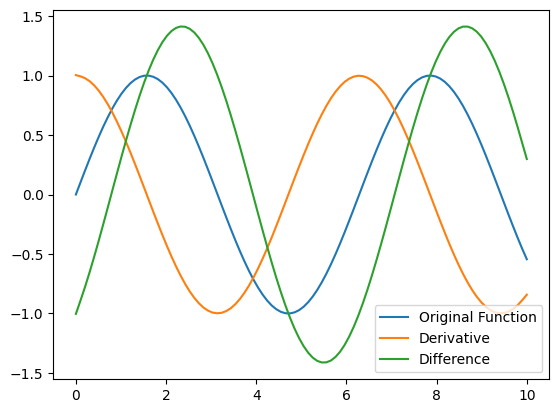

In [9]:
import numpy as np

def three_point(x, y):
    if x.size < 5 or y.size < 5:
        raise ValueError("'x' and 'y' arrays must have 5 values or more.")

    if x.size != y.size:
        raise ValueError("'x' and 'y' must have same size.")

    def dy_mid(h, y0, y2):
        return (1 / (2 * h)) * (y2 - y0)

    def dy_end(h, y0, y1, y2):
        return (1 / (2 * h)) * (-3 * y0 + 4 * y1 - y2)

    hx = x[1] - x[0]
    n = x.size
    dy = np.zeros(n)
    for i in range(0, n):
        if i == 0:
            dy[i] = dy_end(hx, y[i], y[i + 1], y[i + 2])
        elif i == n - 1:
            dy[i] = dy_end(-hx, y[i], y[i - 1], y[i - 2])
        else:
            dy[i] = dy_mid(hx, y[i - 1], y[i + 1])

    return dy

    import matplotlib.pyplot as plt

# Generate data points
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Calculate the derivative
dy = three_point(x, y)

# Plot the original function, the derivative, and their difference
plt.plot(x, y, label='Original Function')
plt.plot(x, dy, label='Derivative')
plt.plot(x, y - dy, label='Difference')
plt.legend()
plt.show()